<a href="https://colab.research.google.com/github/eduardavalerio/Produtos-de-Oceanografia-por-Satelite/blob/main/Produtos_de_oceanografia_por_sat%C3%A9lites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CURSO INPE - PRODUTOS DE OCEANOGRAFIA POR SATÉLITE**
https://geonetcast.wordpress.com/2022/06/08/vlab-produtos-de-oceanografia-por-satelite-conteudo-completo/


## **Introdução**

Curso dividido em 4 seções:

1. **Revisão dos plots da atividade pré-curso:** plot básico - TSM; lendo metadados e adicionando legenda, título e data; adicionando mapas; projeções; paletas personalizadas; plotando uma região específica; adicionando shapefiles e anotações; lendo dados de uma coordenada e adicionando ao plot.
2. **Acessando e trabalhando com vários arquivos:** baixando arquivos via script; construindo animações; operações entre arquivos; séries temporais.
3. **Explorando os dados disponíveis:** Anomalia de TSM; tendência de TSM; alerta de branqueamento de corais; estresse térmico; estresse térmico acumulado; concentração de clorofila; anomalia do nível do mar; corrente geostrófica; ventos de superfície.
4. **Comparação e análise de dados:** Acessando dados de bóias; satélite x bóias; TSM geo x leo; TSM diurno e noturno.

## **Verificando as configurações da máquina virtual**

In [1]:
# Verificando configuração da máquina
!cat /etc/issue
!uname -a
print('\n')

# Verificando a memória
!grep MemTotal /proc/meminfo
print('\n')

# Verificando o HD
!df -h
print('\n')

# Verificando qual o diretório da instalação padrão do Python
!which python
print('\n')

# Verificando qual a versão instalada do Python
!python --version
print('\n')

Ubuntu 22.04.3 LTS \n \l

Linux 58c5558e9f6d 6.1.58+ #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


MemTotal:       13290480 kB


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   45G   64G  42% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  849M  57% /usr/sbin/docker-init
tmpfs           6.4G   44K  6.4G   1% /var/colab
/dev/sda1        71G   54G   17G  77% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


/usr/local/bin/python


Python 3.10.12




## **Instalando as bibliotecas necessárias**

*   **NetCDF4:** Ler os dados de arquivos no formato NetCDF4
*   **Cartopy:** Adicionar mapas aos plots
*   **Boto3:** Download de dados GOES-16 da Amazon
*   **GDAL:** Reprojeção de imagens GOES-16


In [2]:
# Instalando a Biblioteca NetCDF4
!pip install netcdf4
print('\n')

# Instalando a Biblioteca PyHDF
!pip install pyhdf
print('\n')

# Instalando a Biblioteca Cartopy
!pip install cartopy
!pip install shapely --no-binary shapely --force
print('\n')

# Instalando a Biblioteca Boto3
!pip install boto3
print('\n')

# Instalando a Biblioteca GDAL
!apt-add-repository -y ppa:ubuntugis/ubuntugis-unstable
!add-apt-repository -y ppa:ubuntugis/ppa
!apt-get install gdal-bin
!pip install 'gdal==3.0.4'
print('\n')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.4/771.4 kB 1.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 45.8 MB/s eta 0:00:00
  Created wheel for shapely: filename=shapely-2.0.2-cp310-cp310-linux_x86_64.whl size=1027267 sha256=11dfd8d2711ede3573bb07173e85eab25c3e6fddee826fb2e4658e45bedac70d
  Stored in directory: /root/.cache/pip/wheels/1f/6b/52/14cb4558cddc0fd89de08f0e1fd08f816f4f3e1969311377c6
Successfully built shapely
  Attempting uninstall: numpy
    

## **Baixando arquivos auxiliares**

*   **br_unidades_da_federacao.zip:** Shapefile com os estados brasileiros
*   **ne_10m_admin_1_states_provinces.zip:** Shapefile com os estados e províncias mundiais
*   **utilities_ocean.py:** Script para facilitar o download dos arquivos de oceanografia
*   **utilities_goes.py:** Script com algumas funções para processamento de dados de satélite
*   **IR4AVHRR6.cpt:** Paleta de cores para canais infravermelhos do GOES-16
*   **SVGAWVX_TEMP.cpt:** Paleta de cores para canais vapor d'água do GOES-16
*   **coraltemp_v3.1_20220101.nc:** Amostra de arquivo SST Global 5 km

In [3]:
# Baixando o shapefile dos estados brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados brasileiros
!unzip -o br_unidades_da_federacao.zip
print('\n')

# Baixando o shapefile da METAREA V
!wget -c https://github.com/diegormsouza/Oceanography_Python_May_2022/raw/main/Metareas.zip
print('\n')

# Descomprimindo o arquivo de shapefile da METAREA V
!unzip -o Metareas.zip
print('\n')

# Baixando o shapefile dos estados / províncias mundiais
!wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
print('\n')

# Descomprimindo o arquivo de shapefile dos estados / províncias mundiais
!unzip -o ne_10m_admin_1_states_provinces.zip
print('\n')

# Download do script "utilities_ocean.py", para facilitar o download dos arquivos de oceanografia
!wget -c https://raw.githubusercontent.com/diegormsouza/Oceanography_Python_May_2022/main/utilities_ocean.py
print('\n')

# Download do script "utilities_goes.py", do curso de processamento de satélites, com algumas funções que facilitam a manipulação de dados de satélite
!wget -c https://raw.githubusercontent.com/diegormsouza/Oceanography_Python_May_2022/main/utilities_goes.py
print('\n')

# Download da arquivo CPT exemplo (para realce de canais IR)
!wget -c https://raw.githubusercontent.com/diegormsouza/Oceanography_Python_May_2022/main/IR4AVHRR6.cpt
print('\n')

# Download da arquivo CPT exemplo (para realce de canais WV)
!wget -c https://raw.githubusercontent.com/diegormsouza/Oceanography_Python_May_2022/main/SVGAWVX_TEMP.cpt
print('\n')

# Criação dos diretórios de Amostras e Saída
!mkdir -p Samples
!mkdir -p Output

# Download de uma amostra de SST do servidores FTP abertos da NOAA
from ftplib import FTP    # Protocolo de cliente FTP
import os                 # Interfaces do Sistema Operacional

# Cria o diretório de amostras, caso não exista
dir = "Samples"; os.makedirs(dir, exist_ok=True)
# Servidor FTP
ftp = FTP('ftp.star.nesdis.noaa.gov')
# Faz o login
ftp.login('', '')
# Diretório de interesse
path = ('pub/socd/mecb/crw/data/5km/v3.1_op/nc/v1.0/daily/sst/2022/')
ftp.cwd(path)
# Arquivo de interesse
file_name = 'coraltemp_v3.1_20220101.nc'
# Realiza o download do dado
ftp.retrbinary("RETR " + file_name, open(dir + '//' + file_name, 'wb').write)
# Finaliza a conexão
ftp.quit()

--2023-12-29 17:38:12--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10912177 (10M) [application/zip]
Saving to: ‘br_unidades_da_federacao.zip’

br_unidades_da_fede 100%[===================>]  10.41M  7.31MB/s    in 1.4s    

2023-12-29 17:38:14 (7.31 MB/s) - ‘br_unidades_da_federacao.zip’ saved [10912177/10912177]



Archive:  br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


--2023-12-29 17:38:15--  https://github.com/diegormsouza/Oceanography_Python_May_2022/raw/main/Metareas.zip
Resolving github.com (github.

'221 Goodbye.'

## **Script 1: Plot básico**

Plot de um dado global de SST (Sea Surface Temperature) (5 km).

Utiliza a biblioteca `NetCDF4` para ler o dado completo e criar um plot com configurações básicas.

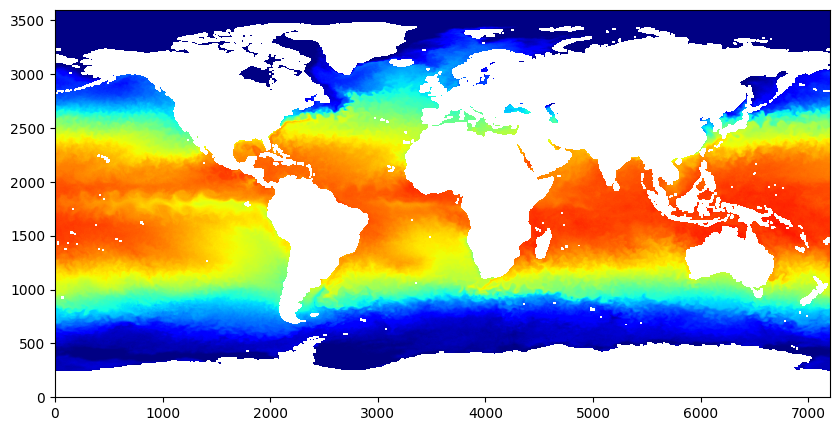

In [4]:
#---------------------------------------------------------------------------------------------------------------------------
# INPE / CGCT / DISSM - Training: Oceanography Products - Script 1: Basic Plot
# Author: Diego Souza (INPE / CGCT / DISSM)
#---------------------------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset      # Read / Write NetCDF4 files
import matplotlib.pyplot as plt  # Plotting library
#---------------------------------------------------------------------------------------------------------------------------
# Open the file using the NetCDF4 library
file = Dataset("Samples/coraltemp_v3.1_20220101.nc")

# Extract the Sea Surface Temperature
data = file.variables['analysed_sst'][0,:,:]
#---------------------------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Plot the image
plt.imshow(data, vmin=-2, vmax=35, origin='lower', cmap='jet')
#---------------------------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig('Output/image_01.png')

# Show the image
plt.show()